# Females Who Exercise

### Torrey Capobianco
#### Bellevue University
#### DSC 530
#### Winter 2019

# Hypothesis

Women who have children under the age of 18 exercise less than women who do not have children under the age of 18.

# Packages

This analysis uses packages and functions from ThinkStats (Allen B. Downey, 2015). 

In [1]:
from __future__ import print_function, division

import sys
import numpy as np
import thinkstats2
import thinkplot
import pandas as pd
import analytic

import statsmodels.formula.api as smf

# The Data

### Import data

The data can be retrieved from: https://www.kaggle.com/bls/american-time-use-survey

In [2]:
resp = pd.read_csv('atusresp.csv')
act = pd.read_csv('atusact.csv')
rost = pd.read_csv('atusrost.csv')

### Understanding the shape

In [3]:
resp.shape[0]

170842

In [4]:
# act has more entries. Each case id has a row for the activity performed
act.shape[0]

3347093

In [5]:
# rost has more entires. Each case id has a row for members in their household
rost.shape[0]

477138

In [6]:
# checking for null values
resp.trchildnum.isnull().sum()
resp.tehrusl1.isnull().sum()
rost.tesex.isnull().sum()
act.tuactdur24.isnull().sum()
act.trtier2p.isnull().sum()
act.trcodep.isnull().sum()
act.trtier1p.isnull().sum()
resp.tespuhrs.isnull().sum()
resp.teernh1o.isnull().sum()


0

In [7]:
# selecting only the entries (rows) for information on the respondent and not their household
rost_self = rost[rost.tulineno == 1]

In [8]:
# number of rows now matches number of rows in the respondent file (170,842)
rost_self.shape[0]

170842

### Variable Selcetion

In [9]:
# selecting the variables relevant to analysis from each data frame
resp2 = pd.DataFrame(resp, columns = ['tucaseid', 'trchildnum', 'tespuhrs', 'tehruslt'])
rost2 = pd.DataFrame(rost_self, columns = ['tucaseid', 'tesex', 'teage'])
act2 = pd.DataFrame(act, columns = ['tucaseid', 'trtier1p', 'trtier2p', 'trcodep', 'tuactdur24'])

tucaseid: case ID for respondent

trchildnum: number of children for respondent

tehruslt: usual hours worked per week for respondent

tespuhrs: usual hours worked per week for respondent's spouse

tesex: sex of respondent

teage: age of respondent

trtier1p: activity category 1st hierarchy

trtier2p: activity category 2nd hierarchy

trcodep: 6 digit activity code

tuactdur24: duration of activity in minutes

### Cleaning and merging data frames

In [10]:
# filtering out the category "sports, exercise & recreation," code 1301 from the activity data frame
act_ex = act2[act2.trtier2p == 1301]

In [11]:
act_ex.shape[0]

38814

In [12]:
# remove low impact recreational activities from trcodep
# low impact recreational acitivities that would not result in "exercise:"
# playing billiards, fishing, hunting, vehicle touring/racing

low1 = act_ex[act_ex.trcodep != 130105] #remove playing billiards
low2 = low1[low1.trcodep != 130112] # remove fishing
low3 = low2[low2.trcodep != 130118] # remove hunting
low4 = low3[low3.trcodep != 130129] # remove vehicle touring/racing

In [13]:
# for each respondent, if they did the acitivty twice in one day in two separate instances, there are two entries
low4.head()

,tucaseid,trtier1p,trtier2p,trcodep,tuactdur24
0,20030100013280,13,1301,130124,60
8,20030100013280,13,1301,130124,140
60,20030100014165,13,1301,130120,60
635,20030101030157,13,1301,130133,45
636,20030101030157,13,1301,130124,15


In [14]:
# combining each entry for the same activity per respondent for a total duration time, removing individual exercise activities
act_ex2 = pd.DataFrame(low4, columns = ['tucaseid', 'trtier1p', 'trtier2p', 'tuactdur24'])
act_ex3 = act_ex2.groupby(['tucaseid', 'trtier1p', 'trtier2p'], as_index=False).sum()

In [15]:
# all exercise activities per respondent are combined to one line
act_ex3.head()

,tucaseid,trtier1p,trtier2p,tuactdur24
0,20030100013280,13,1301,200
1,20030100014165,13,1301,60
2,20030101030157,13,1301,60
3,20030101030758,13,1301,150
4,20030101030811,13,1301,20


In [16]:
act_ex3.shape[0]

28048

In [17]:
# merge resp2 and rost2 data frames to bring in the sex and age
resp_rost = pd.merge(resp2, rost2, on = 'tucaseid')

In [18]:
resp_rost.head()

,tucaseid,trchildnum,tespuhrs,tehruslt,tesex,teage
0,20030100013280,0,-1.0,30,1,60
1,20030100013344,2,50.0,30,2,41
2,20030100013352,0,-1.0,12,2,26
3,20030100013848,2,40.0,-1,2,36
4,20030100014165,2,-1.0,80,1,51


In [19]:
# merge resp_rost and act_ex3 data frames to bring in the exercise activity and duration
resp_ex = pd.merge(resp_rost, act_ex3, on = 'tucaseid')

In [20]:
resp_ex.head()

,tucaseid,trchildnum,tespuhrs,tehruslt,tesex,teage,trtier1p,trtier2p,tuactdur24
0,20030100013280,0,-1.0,30,1,60,13,1301,200
1,20030100014165,2,-1.0,80,1,51,13,1301,60
2,20030101030157,0,-1.0,45,1,27,13,1301,60
3,20030101030758,1,-1.0,45,1,38,13,1301,150
4,20030101030811,0,-1.0,50,1,31,13,1301,20


# Histograms and Descriptive Characteristics

In [21]:
# filering out women
resp_ex_fem = resp_ex[resp_ex.tesex == 2]

### Time spent exercising

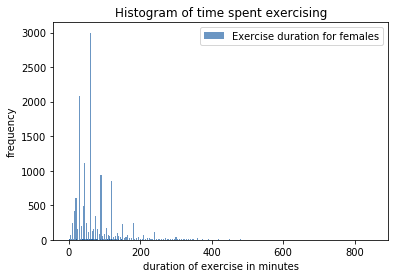

<Figure size 576x432 with 0 Axes>

In [22]:
# tuactdur24
# histogram of time spent exercising for females 
hist_ex_fem = thinkstats2.Hist(resp_ex_fem.tuactdur24, label='Exercise duration for females')

width = 3

thinkplot.PrePlot(1)
thinkplot.Hist(hist_ex_fem, width = width)
thinkplot.Show(title = 'Histogram of time spent exercising', xlabel='duration of exercise in minutes', ylabel='frequency')

In [23]:
print('The mode is: 60 minutes.')
print('The mean is:', resp_ex_fem.tuactdur24.mean())
print('The variance is:', resp_ex_fem.tuactdur24.var())
print('The standard deviation is:', resp_ex_fem.tuactdur24.std())

The mode is: 60 minutes.
The mean is: 77.37604122546944
The variance is: 4676.858441821068
The standard deviation is: 68.3875605780837


In [24]:
# maximum minutes that female respondent recorded to be spending in category "sports, exercise, & recreation" which is 15 hours
resp_ex_fem["tuactdur24"].max()

850

In [25]:
# frequency of top 20 largest length of exercise
for tuactdur24, freq in hist_ex_fem.Largest(20):
    print(tuactdur24, freq)

850 1
777 1
690 1
625 1
615 1
610 1
609 1
601 1
570 1
565 1
540 3
530 2
525 2
524 1
520 4
519 1
515 1
510 3
505 2
500 2


In [26]:
# Outliers
# remove cases where exercise is greater than 240 minutes or 4 hours as more than 4-15 hours of exercise in 1 day seems not 
# reasonable for many respondents.
resp_ex_fem2 = resp_ex_fem[resp_ex_fem.tuactdur24 <= 240]

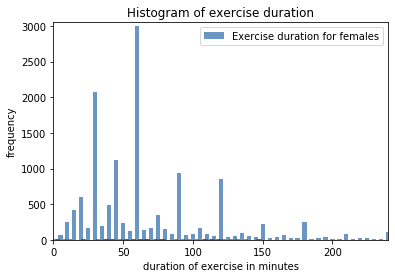

<Figure size 576x432 with 0 Axes>

In [27]:
hist_ex_fem2 = thinkstats2.Hist(resp_ex_fem2.tuactdur24, label='Exercise duration for females')

width = 3

thinkplot.PrePlot(1)
thinkplot.Hist(hist_ex_fem2, width = width)
thinkplot.Show(title = 'Histogram of exercise duration', xlabel='duration of exercise in minutes', 
               ylabel='frequency', axis=[0, 240, 0, 3050])

In [28]:
print('The mode is: 60 minutes.')
print('The mean is:', resp_ex_fem2.tuactdur24.mean())
print('The variance is:', resp_ex_fem2.tuactdur24.var())
print('The standard deviation is:', resp_ex_fem2.tuactdur24.std())
print('The histogram is left skewed with most of the time spent exercising in the left tail with the right tail extending far to the right.')

The mode is: 60 minutes.
The mean is: 68.50642335766423
The variance is: 2198.3885272461675
The standard deviation is: 46.88697609407294
The histogram is left skewed with most of the time spent exercising in the left tail with the right tail extending far to the right.


### Age

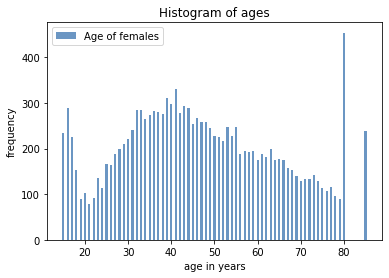

<Figure size 576x432 with 0 Axes>

In [29]:
# teage
# histogram of ages of females who exercise
hist_ex_fem_age = thinkstats2.Hist(resp_ex_fem2.teage, label='Age of females')

width = .5

thinkplot.PrePlot(1)
thinkplot.Hist(hist_ex_fem_age, width = width)
thinkplot.Show(title = 'Histogram of ages', xlabel='age in years', ylabel='frequency')

In [30]:
print('The mode is: 80 years')
print('The mean is:', resp_ex_fem2.teage.mean())
print('The variance is:', resp_ex_fem2.teage.var())
print('The standard deviation is:', resp_ex_fem2.teage.std())
print('The histogram is multimodal, with a range with females less than their 20\'s, mid 40\'s, and the right tail their 80\'s.')

The mode is: 80 years
The mean is: 46.957664233576644
The variance is: 326.5769359263821
The standard deviation is: 18.07143978565023
The histogram is multimodal, with a range with females less than their 20's, mid 40's, and the right tail their 80's.


### Number of Children

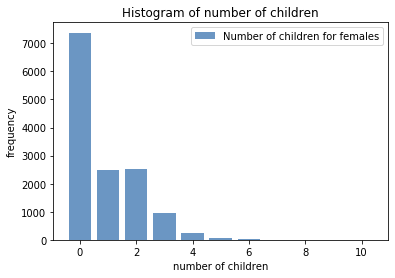

<Figure size 576x432 with 0 Axes>

In [31]:
# trchildnum
# histogram of number of children for females who exercise
hist_ex_fem_children = thinkstats2.Hist(resp_ex_fem2.trchildnum, label='Number of children for females')

width = .8

thinkplot.PrePlot(1)
thinkplot.Hist(hist_ex_fem_children, width = width)
thinkplot.Show(title = 'Histogram of number of children', xlabel='number of children', ylabel='frequency')

In [32]:
print('The mode is: 0 children')
print('The mean is:', resp_ex_fem2.trchildnum.mean())
print('The variance is:', resp_ex_fem2.trchildnum.var())
print('The standard deviation is:', resp_ex_fem2.trchildnum.std())
print('The histogram is left negative skewed with a tail extending far to the right.')

The mode is: 0 children
The mean is: 0.8681021897810219
The variance is: 1.278243715376187
The standard deviation is: 1.130594407989084
The histogram is left negative skewed with a tail extending far to the right.


### Usual number of hours worked per week for respondent

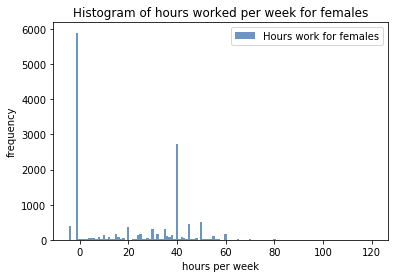

<Figure size 576x432 with 0 Axes>

In [33]:
# tehruslt
# histogram of usual hours work per week for female respondent
# value of -4 means hours vary
# value of -1 means does not work
hist_ex_fem_work = thinkstats2.Hist(resp_ex_fem2.tehruslt, label='Hours work for females')

width = 1

thinkplot.PrePlot(1)
thinkplot.Hist(hist_ex_fem_work, width = width)
thinkplot.Show(title = 'Histogram of hours worked per week for females', xlabel='hours per week', ylabel='frequency')

In [34]:
print('The mode is: -1 or does not work.')
print('The mean is:', resp_ex_fem2.tehruslt.mean())
print('The variance is:', resp_ex_fem2.tehruslt.var())
print('The standard deviation is:', resp_ex_fem2.tehruslt.std())
print('The histogram is binominal, with two peaks at -1 (does not work) and 40 hours.')

The mode is: -1 or does not work.
The mean is: 19.04970802919708
The variance is: 443.0823526411815
The standard deviation is: 21.0495214349681
The histogram is binominal, with two peaks at -1 (does not work) and 40 hours.


### Usual number of hours worked per week for respondent's spouse

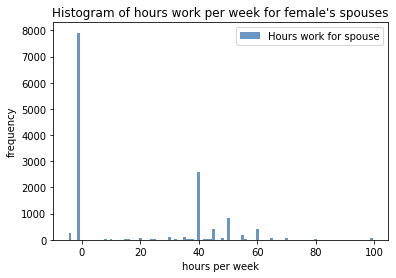

<Figure size 576x432 with 0 Axes>

In [35]:
# tespuhrs
# histogram of usual hours work per week for spouse of female respondent
# value of -4 means hours vary
# value of -1 means does not work
hist_ex_fem_work_sp = thinkstats2.Hist(resp_ex_fem2.tespuhrs, label='Hours work for spouse')

width = 1

thinkplot.PrePlot(1)
thinkplot.Hist(hist_ex_fem_work_sp, width = width)
thinkplot.Show(title = 'Histogram of hours work per week for female\'s spouses', xlabel='hours per week', ylabel='frequency')

In [36]:
print('The mode is: -1 or does not work.')
print('The mean is:', resp_ex_fem2.tespuhrs.mean())
print('The variance is:', resp_ex_fem2.tespuhrs.var())
print('The standard deviation is:', resp_ex_fem2.tespuhrs.std())
print('The histogram is binominal, with two peaks at -1 (does not work) and 40 hours.')

The mode is: -1 or does not work.
The mean is: 17.326934306569342
The variance is: 563.6318462106941
The standard deviation is: 23.740931873258347
The histogram is binominal, with two peaks at -1 (does not work) and 40 hours.


# Comparing Two Scenarios with PMF
## Females who exercise
### With children under 18 or without children

In [37]:
# looking at females who exercise that have children under the age of 18 vs no children under the age of 18
fem_child = resp_ex_fem2[resp_ex_fem2.trchildnum > 0]
fem_nochild = resp_ex_fem2[resp_ex_fem2.trchildnum == 0]

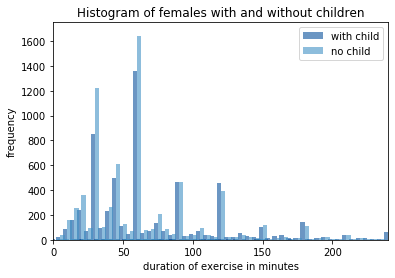

<Figure size 576x432 with 0 Axes>

In [38]:
# histogram comparison
hist_child_fem_ex = thinkstats2.Hist(fem_child.tuactdur24, label='with child')
hist_nochild_fem_ex = thinkstats2.Hist(fem_nochild.tuactdur24, label='no child')

width = 3

thinkplot.PrePlot(2)
thinkplot.Hist(hist_child_fem_ex, align='right', width = width)
thinkplot.Hist(hist_nochild_fem_ex, align='left', width=width)
thinkplot.Show(title = 'Histogram of females with and without children', xlabel='duration of exercise in minutes', 
               ylabel='frequency', axis=[0, 240, 0, 1750])

In [39]:
# PMF distributions of child and no child
child_pmf = thinkstats2.Pmf(fem_child.tuactdur24, label = "with child")
nochild_pmf = thinkstats2.Pmf(fem_nochild.tuactdur24, label = "no child")

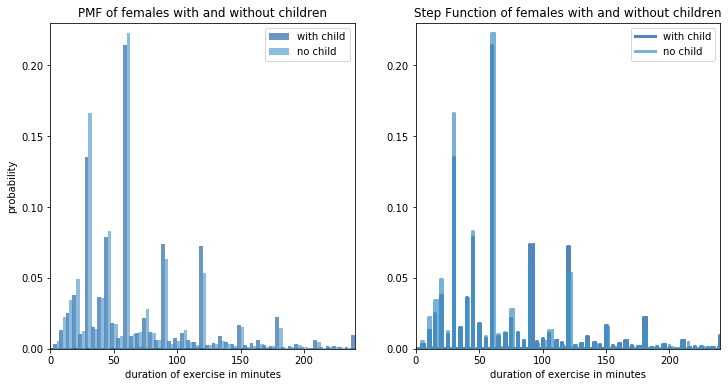

In [40]:
# PMF comparison
width=3
axis = [0, 240, 0, .23]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(child_pmf, align='right', width=width)
thinkplot.Hist(nochild_pmf, align='left', width=width)
thinkplot.Config(title = 'PMF of females with and without children', xlabel='duration of exercise in minutes', 
                 ylabel='probability', axis=axis)

# step function
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([child_pmf, nochild_pmf])
thinkplot.Config(title = 'Step Function of females with and without children', xlabel='duration of exercise in minutes', 
                 ylable = 'probability', axis=axis)

In [41]:
# mean
fem_child.tuactdur24.mean(), fem_nochild.tuactdur24.mean()

(73.34345831355797, 64.36292180512264)

In [42]:
# variance
fem_child.tuactdur24.var(), fem_nochild.tuactdur24.var()

(2401.307492405041, 1987.6500535927373)

In [43]:
# standard deviation
fem_child.tuactdur24.std(), fem_nochild.tuactdur24.std()

(49.003137577149495, 44.583069136082784)

# Comparing Two Scenarios with CDF
## Females who exercise
### With children under 18 or without children

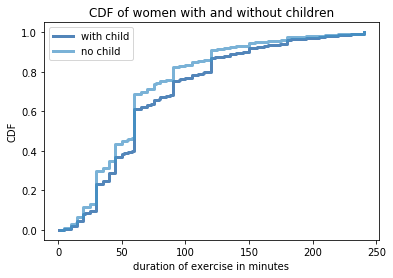

In [44]:
# CDF of duration of women who exercise with children and without children
child_cdf = thinkstats2.Cdf(fem_child.tuactdur24, label = "with child") #dark blue
nochild_cdf = thinkstats2.Cdf(fem_nochild.tuactdur24, label = "no child") #light blue

thinkplot.PrePlot(2)
thinkplot.Cdfs([child_cdf, nochild_cdf])
thinkplot.Config(title = 'CDF of women with and without children', xlabel='duration of exercise in minutes', ylabel='CDF')

In [45]:
# no child: less than 100 mintues: 82% of females
# with child: less than 100 minutes: 78% of females

# no child: less than 50 minutes: 45% of females
# with child: less than 50 minutes: 39% of females

# less 60 minutes both with and without children are about 60% of the time
# over 60 minutes, women with no children tend to exercise more

# 30 minutes is another common exercise duration between the two groups

# Analytical Distribution
## Exponential Distribution
### Women who exercise

#### Lognormal Distribution

In [46]:
def MakeNormalModel(weights):
    """Plots a CDF with a Normal model.

    weights: sequence
    """
    cdf = thinkstats2.Cdf(weights, label='duration')

    mean, var = thinkstats2.TrimmedMeanVar(weights)
    std = np.sqrt(var)
    print('n, mean, std', len(weights), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

In [47]:
duration = resp_ex_fem2.tuactdur24

n, mean, std 13700 1.7410207945219451 0.28301808851110255


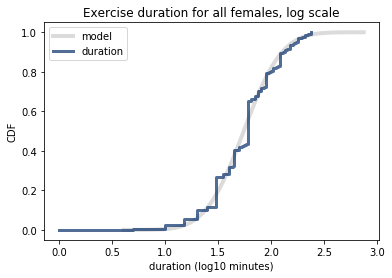

In [48]:
# Exercise duration for all females
log_duration = np.log10(duration)
MakeNormalModel(log_duration)
thinkplot.Config(title='Exercise duration for all females, log scale', xlabel='duration (log10 minutes)',
                 ylabel='CDF', loc='upper left')

In [49]:
# The lognormal model has a small standard devation close to the mean. It is a good model fit for the data. It can model how
# many minutes a female may exercise in one day.

# Variable Relationships

In [50]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [51]:
# function to calculate covariance
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [52]:
# function to calculate Pearson's Correlation
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [53]:
# function to calculate Spearman's Rank Correlation
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

### Number of children vs Exercise minutes

#### Scatter Plot

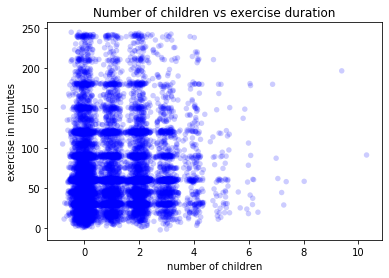

In [54]:
exercise = resp_ex_fem2.tuactdur24
children = resp_ex_fem2.trchildnum

exercise = Jitter(exercise, 1.4)
children = Jitter(children, .2)

thinkplot.Scatter(children, exercise, alpha=.2)
thinkplot.Config(title='Number of children vs exercise duration', xlabel='number of children',
                 ylabel='exercise in minutes',
                 legend=False)

#### Covariance

In [55]:
Cov(children, exercise)

4.412220890771357

In [56]:
# Covariance is positive, which indicates both number of children and the duration of exercising moves together in the same
# direction. It would imply that the more children you have, the more you exercise.

#### Pearson's Correlation

In [57]:
Corr(children, exercise)

0.08176692456087202

In [58]:
# Pearson's correlation is positive, however since it is close to zero implies there is no correlation between the variables. 

#### Spearman's Rank Correlation

In [59]:
SpearmanCorr(children, exercise)

0.07644053044884747

In [60]:
# Spearman's rank correlation should be used since the scatter plot implies it is non linear.
# The Spearman's rank correlation is very close to zero, which indicates there is no relationship between number of children 
# and time spent exercising.

### Number of hours work vs Exercise duration

#### Scatter Plot

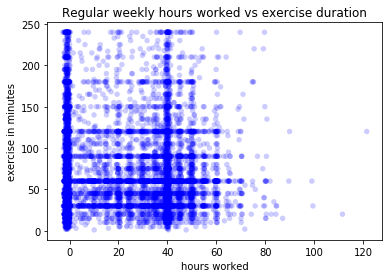

In [61]:
work = resp_ex_fem2[resp_ex_fem2.tehruslt > -4] #filter out where hours vary

work2 = work.tehruslt
exercise2 = work.tuactdur24

work2 = Jitter(work2, .5)

thinkplot.Scatter(work2, exercise2, alpha=.2)
thinkplot.Config(title='Regular weekly hours worked vs exercise duration', xlabel='hours worked',
                 ylabel='exercise in minutes',
                 legend=False)

#### Covariance

In [62]:
Cov(work2, exercise2)

-8.034950496053037

In [63]:
# Negative covariance between regular hours worked and exercise means they move inversely. The more hours worked, the less
# minutes exercised

#### Pearson's Correlation

In [64]:
Corr(work2, exercise2)

-0.008161102244907752

In [65]:
# Pearson's correlation is negative, however, since it is very close to zero it implies there is no relationship between the
# variables.

#### Spearman's Rank Correlation

In [66]:
SpearmanCorr(work2, exercise2)

0.006958422871847362

In [67]:
# Spearman's rank correlation should be used since the scatter plot reflects it is non linear.
# Spearman's rank correlation is very close to zero which implies there is no relationship between the variables.

### Age vs Exercise duration

#### Scatter Plot

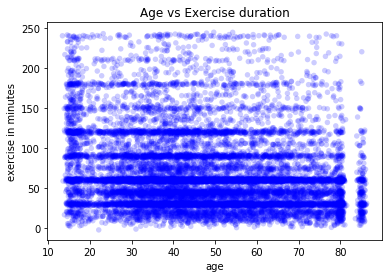

In [68]:
age = resp_ex_fem2.teage 
age = Jitter(age, .5)

thinkplot.Scatter(age, exercise, alpha=.2)
thinkplot.Config(title='Age vs Exercise duration', xlabel='age',
                 ylabel='exercise in minutes',
                 legend=False)

#### Covariance

In [69]:
Cov(age, exercise)

-160.5926923935532

In [70]:
# Negtative covariance between age and exercise duration means they move inversely. As one increases the other decreases.

#### Pearson's Correlation

In [71]:
Corr(age, exercise)

-0.1893308320028366

In [72]:
# Pearson's correlation is negative, but close to zero, which implies theres no relationship between the two.

#### Spearman's Rank Correlation

In [73]:
SpearmanCorr(age, exercise)

-0.18983264098577954

In [74]:
# Spearman's Rank correlation is negative, but close to zero, which imples there is no relationship between the two.

# Hypothesis Test

In [75]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [76]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

#### Permutation Test

In [77]:
# permutation difference of means
# modeling the null hypothesis
data = fem_child.tuactdur24, fem_nochild.tuactdur24
hyp_test1 = DiffMeansPermute(data)
pvalue = hyp_test1.PValue()
pvalue

0.0

In [78]:
# p-value is less than 1, which indicates it is statistically significant. It is unlikely due to chance.

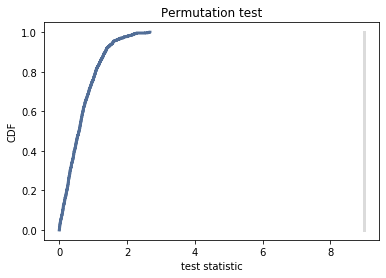

In [79]:
hyp_test1.PlotCdf()
thinkplot.Config(title='Permutation test', xlabel='test statistic',
                   ylabel='CDF')

#### False Negative Test

In [80]:
def FalseNegRate(data, num_runs=1000):
    """Computes the chance of a false negative based on resampling.

    data: pair of sequences
    num_runs: how many experiments to simulate

    returns: float false negative rate
    """
    group1, group2 = data
    count = 0

    for i in range(num_runs):
        sample1 = thinkstats2.Resample(group1)
        sample2 = thinkstats2.Resample(group2)
        ht = DiffMeansPermute((sample1, sample2))
        p_value = ht.PValue(iters=101)
        if p_value > 0.05:
            count += 1

    return count / num_runs

In [81]:
# test how many times the real effect will fail
neg_rate = FalseNegRate(data)
neg_rate

0.0

In [82]:
# after drawing random samples from each group, the false negative test returns a false negative 0% of the time. 

# Regression Analysis

### Linear Least Squares

In [83]:
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

def CoefDetermination(ys, res):
    return 1 - Var(res) / Var(ys)

def Residuals(xs, ys, inter, slope):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    res = ys - (inter + slope * xs)
    return res

In [84]:
age = resp_ex_fem2.teage
duration = resp_ex_fem2.tuactdur24

In [85]:
inter, slope = thinkstats2.LeastSquares(age, duration)
fit_xs, fit_ys = thinkstats2.FitLine(age, inter, slope)

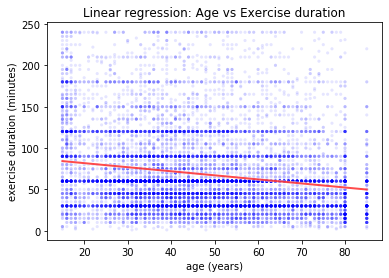

In [86]:
thinkplot.Scatter(age, duration, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(title='Linear regression: Age vs Exercise duration', xlabel="age (years)",
                 ylabel='exercise duration (minutes)',
                 legend=False)

In [87]:
res = Residuals(age, duration, inter, slope)
r2 = CoefDetermination(duration, res)
r2

0.03584979068777738

In [88]:
# age accounts for 3.6% of exercise duration

### Simple Regression

#### Exercise duration as a function of age

In [89]:
formula = 'tuactdur24 ~ teage'
model = smf.ols(formula, data = resp_ex_fem2)
results = model.fit()

In [90]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             tuactdur24   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     509.3
Date:                Mon, 24 Feb 2020   Prob (F-statistic):          9.17e-111
Time:                        20:31:00   Log-Likelihood:                -71903.
No. Observations:               13700   AIC:                         1.438e+05
Df Residuals:                   13698   BIC:                         1.438e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     91.5744      1.095     83.613      0.0

In [91]:
# R^2 is 3.6% which is the same from the coeficient of determination of the linear least squares test

#### Exercise duration as a function of having children

In [92]:
# creating boolean for child or no child
resp_ex_fem2['haschild'] = resp_ex_fem2.trchildnum > 0

C:\Users\Torrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
# exercise duration as a function of having children
formula = 'tuactdur24 ~ haschild'
model = smf.ols(formula, data=resp_ex_fem2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tuactdur24   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     126.0
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           4.04e-29
Time:                        20:31:00   Log-Likelihood:                -72090.
No. Observations:               13700   AIC:                         1.442e+05
Df Residuals:                   13698   BIC:                         1.442e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           64.3629      0.543    118.456      0.000      63.298      65.428
haschild[T.True]     8.9805      0.800     11.227      0.000       7.413      10.548
==============================================================================
Omnibus:                     3193.379   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6469.184
Skew:                           1.396   Prob(JB):                         0.00
Kurtosis:                       4.880   Cond. No.                         2.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# p-value for the y-intercept and the slope are 0. It is likely to not occure by chance that there is a difference between
# women who have children and do not have children and the duration that they exercise.

# R^2 is 0.009 or .9%. The R^2 value means that having children is not the only thing that accounts for the difference in
# exercise duration between the two groups.

### Multiple Regression

#### Exercise duration as a function of having children and female age

In [95]:
formula = 'tuactdur24 ~ haschild + teage'
model = smf.ols(formula, data=resp_ex_fem2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tuactdur24   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     255.7
Date:                Mon, 24 Feb 2020   Prob (F-statistic):          9.04e-110
Time:                        20:31:00   Log-Likelihood:                -71902.
No. Observations:               13700   AIC:                         1.438e+05
Df Residuals:                   13697   BIC:                         1.438e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           93.2104      1.570     59.356      0.000      90.132      96.289
haschild[T.True]    -1.3818      0.951     -1.454      0.146      -3.245       0.482
teage               -0.5125      0.026    -19.543      0.000      -0.564      -0.461
==============================================================================
Omnibus:                     3183.238   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6532.242
Skew:                           1.382   Prob(JB):                         0.00
Kurtosis:                       4.951   Cond. No.                         222.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
# r^2 has improved to 3.6% accountability when adding age with having children. 
# p-value of having children increases to 0.146. This is greater than .05, is not statisically significant. 
# it leads to determine a failure to reject the null hypothesis when age is added.

#### Exercise duration as a function of having children, age, hours work per week for self and for spouse

In [97]:
formula = 'tuactdur24 ~ haschild + teage + tehruslt + tespuhrs'
model = smf.ols(formula, data=resp_ex_fem2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tuactdur24   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     145.2
Date:                Mon, 24 Feb 2020   Prob (F-statistic):          8.94e-122
Time:                        20:31:00   Log-Likelihood:                -71869.
No. Observations:               13700   AIC:                         1.437e+05
Df Residuals:                   13695   BIC:                         1.438e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           98.6877      1.737     56.819      0.000      95.283     102.092
haschild[T.True]    -0.7099      1.002     -0.708      0.479      -2.674       1.255
teage               -0.5578      0.027    -20.605      0.000      -0.611      -0.505
tehruslt            -0.1176      0.020     -6.028      0.000      -0.156      -0.079
tespuhrs            -0.0820      0.018     -4.586      0.000      -0.117      -0.047
==============================================================================
Omnibus:                     3163.839   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6503.445
Skew:                           1.372   Prob(JB):                         0.00
Kurtosis:                       4.967   Cond. No.                         268.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
# children, age, hours worked, and spouses hours worked only accounts for 4.1% of how much women exercise
# p-value for having children is greater than .05 (0.479). This is not statistically significant and will rejct the null
# hypothesis as it has no affect on determining the exercise duration with the relation of the other variables.

In [99]:
formula = 'tuactdur24 ~ teage + tehruslt + tespuhrs'
model = smf.ols(formula, data=resp_ex_fem2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tuactdur24   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     193.4
Date:                Mon, 24 Feb 2020   Prob (F-statistic):          7.59e-123
Time:                        20:31:00   Log-Likelihood:                -71869.
No. Observations:               13700   AIC:                         1.437e+05
Df Residuals:                   13696   BIC:                         1.438e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     97.8996      1.334     73.407      0.000      95.285     100.514
teage         -0.5474      0.023    -24.059      0.000      -0.592      -0.503
tehruslt      -0.1155      0.019     -5.990      0.000      -0.153      -0.078
tespuhrs      -0.0859      0.017     -5.042      0.000      -0.119      -0.052
==============================================================================
Omnibus:                     3162.417   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6498.278
Skew:                           1.371   Prob(JB):                         0.00
Kurtosis:                       4.966   Cond. No.                         191.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
# Changing the predictive variables by removing having children did not change the r-squared.

# Conclusion

Looking at if females who have children exercise less than those that do not have children, through comparisons of CDF, hypothesis testing, and simple regression, the analysis points to the null hypothesis being statically significant. We will reject the null hypothesis and accept the alternative that females with children exercise less than those that do not have children. However, having children alone does not account for the majority of reasons why females exercise less. Having children only accounts for 0.9% of the difference in exercising between the two groups. Other reasons as to why they exercise less were not found in this study. When adding other variables such as age, hours the respondent worked, and the hours their spouse worked, it increased the accountability for exercise duration, however, having children or no children did not affect the duration of exercise when mixed with the other variables. In this case the null hypothesis would be accepted and the alternative would be rejected.